<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/NER_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install gradio

     |████████████████████████████████| 6.1 MB 5.1 MB/s 
     |████████████████████████████████| 112 kB 57.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 270 kB 50.7 MB/s 
     |████████████████████████████████| 212 kB 58.2 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 57 kB 3.8 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 2.3 MB 42.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 80 kB 6.5 MB/s 
     |████████████████████████████████| 68 kB 3.5 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 594 kB 6.3 MB/s 
     |████████████████████████████████| 856 kB 46.4 MB/s 
     |████████████████████████████████| 4.0 MB 41.5 MB/s 


In [2]:
!pip install -q transformers

     |████████████████████████████████| 4.7 MB 5.2 MB/s 
     |████████████████████████████████| 120 kB 62.7 MB/s 
     |████████████████████████████████| 6.6 MB 40.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import spacy
import gradio as gr
nlp = spacy.load("en_core_web_sm")
nlp.to_disk("/content/drive/MyDrive/AFW")
def ner(sentence):
    doc = nlp(sentence)
    ents = [(e.text, e.label_) for e in doc.ents]
    return ents
iface = gr.Interface(fn=ner, inputs="text", outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://29484.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fab522b4490>,
 'http://127.0.0.1:7860/',
 'https://29484.gradio.app')

In [ ]:
n = spacy.load("/content/spacy")
doc = n("Narendra Modi works at Infosys")
ents = [(e.text, e.label_) for e in doc.ents]
ents

[('Narendra Modi', 'PERSON'), ('Infosys', 'ORG')]

In [ ]:
%%writefile sample.txt
The growth of smart devices tied to energy consumption gives energy providers a competitive advantage.

Overwriting sample.txt


In [ ]:
import spacy
import re
import json
def preprocess_function(input_data,content_type = None ):
    sentences = list(input_data)
    test_data = []
    for sen in sentences:
      # Remove punctuations and numbers
      sen = re.sub('[^a-zA-Z]', ' ', sen)
      # Single character removal
      sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)
      # Removing multiple spaces
      sen = re.sub(r'\s+', ' ', sen)
      test_data.append(sen)
    
    return "".join(test_data)

#
def predict_function(input_data, nlp):
    
    # Predict image using model
    doc = nlp(input_data)
    ents = [(e.text, e.label_) for e in doc.ents]
    print(ents)
    return ents
#
def model_load_function(model_file):
    # load model
    nlp = spacy.load("/content/drive/MyDrive/AFW")
    return nlp
#
def postprocess_function(entity,content_type = None ):
    
    return json.dumps({"response": "Named Entitiesin the text  provided : {}".format(entity)})

if __name__ == "__main__":
    with open("/content/sample.txt","r") as f:
      data = f.read()
    print(data)
    input_data = preprocess_function(data)
    print(input_data)
    model_file = "/content/drive/MyDrive/AFW"
    nlp = model_load_function(model_file)
    entity = predict_function(input_data, nlp)
    output = postprocess_function(entity)
    print(output)

Narendra Modi works at Infosys
Narendra Modi works at Infosys
[('Narendra Modi', 'PERSON'), ('Infosys', 'ORG')]
{"response": "Named Entitiesin the text  provided : [('Narendra Modi', 'PERSON'), ('Infosys', 'ORG')]"}


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 33.4 MB/s 
     |████████████████████████████████| 6.6 MB 55.6 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 


## Saving and loading hugging face models locally

https://github.com/huggingface/transformers/issues/2422

#### It can be done as the documentation suggests.
Once you've got the pre-trained tokenizer and model loaded the first time via (say for T5):

* tokenizer = AutoTokenizer.from_pretrained("t5-small")
* model = TFAutoModelWithLMHead.from_pretrained("t5-small")

#### You can then save them locally via:

* tokenizer.save_pretrained('./local_model_directory/')
* model.save_pretrained('./local_model_directory/')

#### And then simply load from the directory:

* tokenizer = AutoTokenizer.from_pretrained('./local_model_directory/')
* model = TFAutoModelWithLMHead.from_pretrained('./local_model_directory/

In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import gradio as gr

# Loading and setting up GPT2 Open AI Transformer Model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2", 
                                          pad_token_id=tokenizer.eos_token_id)

tokenizer.save_pretrained('/content/drive/MyDrive/AFW/Transformer')
model.save_pretrained('/content/drive/MyDrive/AFW/Transformer')

def generate_text(inp):
    # Encoding the starting point of the sentence we want to predict
    input_data = tokenizer.encode(inp, 
                                  return_tensors='tf')
    # Generating Output String
    output = model.generate(
        input_data, 
        do_sample=True, 
        max_length=50, 
        top_k=30
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)

gr.Interface(generate_text,
             "textbox", 
             gr.outputs.Textbox()).launch(share=True) #, debug=True Use in Colab

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://35030.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f206a872510>,
 'http://127.0.0.1:7862/',
 'https://35030.gradio.app')

In [ ]:
ner("Apple is headquartered in the US.")

[('Apple', 'ORG'), ('US', 'GPE')]

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('/content/drive/MyDrive/AFW/Transformer')
model = TFGPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/AFW/Transformer')

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at /content/drive/MyDrive/AFW/Transformer.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
gr.Interface(generate_text,
             "textbox", 
             gr.outputs.Textbox()).launch(share=True) #, debug=True Use in Colab

/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://26686.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1fc11f1dd0>,
 'http://127.0.0.1:7863/',
 'https://26686.gradio.app')

In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import json
import re
def preprocess_function(input_data,content_type = None ):
    sentences = list(input_data)
     
    return "".join(sentences)

#
def predict_function(input_data, model_info):
    tokenizer,model = model_info
    # Predict image using model
    input_data = tokenizer.encode(input_data,return_tensors='tf')
    # Generating Output String
    output = model.generate(
        input_data, 
        do_sample=True, 
        max_length=50, 
        top_k=30
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)
#
def model_load_function(model_file):
    # load model
    tokenizer = GPT2Tokenizer.from_pretrained(model_file)
    model = TFGPT2LMHeadModel.from_pretrained(model_file )
    return (tokenizer,model)
#
def postprocess_function(predictions,content_type = None ):
    
    return json.dumps({"response": "Text Generated  : {}".format(predictions)})

if __name__ == "__main__":
    with open("/content/sample.txt","r") as f:
      data = f.read()
    print(data)
    input_data = preprocess_function(data)
    print(input_data)
    model_file = "/content/drive/MyDrive/AFW/Transformer"
    model_tuple = model_load_function(model_file)
    predictions = predict_function(input_data, model_tuple)
    output = postprocess_function(predictions)
    print(output)

The growth of smart devices tied to energy consumption gives energy providers a competitive advantage.
The growth of smart devices tied to energy consumption gives energy providers a competitive advantage.


All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at /content/drive/MyDrive/AFW/Transformer.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


{"response": "Text Generated  : The growth of smart devices tied to energy consumption gives energy providers a competitive advantage. In recent years, energy providers in some large and developing economies are growing increasingly dependent on renewables\u2014and there are now growing challenges for energy consumers. China is set to become"}


## Text Generation

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from transformers import pipeline,set_seed
generator = pipeline("text-generation",model="gpt2")
generator.save_pretrained("/content/drive/MyDrive/AFW/Text_Generation")
set_seed(42)
def pred_text(text):
  return generator(text,max_length=50,num_return_sequences=3)

In [ ]:
pipeline("text-generation",model=("/content/drive/MyDrive/AFW/Text_Generation"))

In [ ]:
pred_text("You look amazing today,")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'You look amazing today, I was in front of my friends. I wanted everyone to see me. But that\'s all. No one really cares about me in the eyes of the whole world unless I love them."\n\nIn a second Facebook post'},
 {'generated_text': 'You look amazing today, and I know I am going to get the job done! So thank you all for all those donations, money, help, and hugs. I hope to see you again soon.'},
 {'generated_text': "You look amazing today, but I will have to wait until early June for what will go down as the first NBA championship (a thing I had been expecting). If it's not the biggest, it is also not great. Now let's look at"}]

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 6.1 MB 31.5 MB/s 
     |████████████████████████████████| 112 kB 63.1 MB/s 
     |████████████████████████████████| 84 kB 1.8 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 275 kB 60.7 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 212 kB 76.9 MB/s 
     |████████████████████████████████| 2.3 MB 60.1 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 4.1 MB 9.3 MB/s 
     |████████████████████████████████| 62 kB 668 kB/s 
     |████████████████████████████████| 856 kB 43.3 MB/s 


In [ ]:
import gradio as gr
from gradio import components
'''
gr.Interface(pred_text,
             "textbox", 
             gr.outputs.Textbox()).launch(share=True) #, debug=True Use in Colab
'''
gr.Interface(pred_text,
             "textbox", 
             "textbox").launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://10079.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f07197e6e50>,
 'http://127.0.0.1:7862/',
 'https://10079.gradio.app')

In [ ]:
%%writefile sample1.txt
Please fin the document

Writing sample1.txt


In [ ]:
from transformers import pipeline,set_seed
import json
import re
def preprocess_function(input_data,content_type = None ):
    with open(input_data,"r") as f:
      data = f.read()
    print(data)
    return data

#
def predict_function(input_data, model): 
    return model(input_data,max_length=100,num_return_sequences=3)
#
def model_load_function(model_file):
    # load model
    model = pipeline("text-generation",model=model_file)
    return model
#
def postprocess_function(predictions,content_type = None ):
    for i,items in enumerate(predictions):
      print("*"* 80)
      print(f"Sequence {i} generated text : {items['generated_text']}")
      print("\n")
    
    return json.dumps({"response": "Text Generated  : {}".format(predictions)})

if __name__ == "__main__":
    data_path = "/content/sample.txt"
    input_data = preprocess_function(data_path)
    model_file = "/content/drive/MyDrive/AFW/Text_Generation"
    model = model_load_function(model_file)
    predictions = predict_function(input_data, model)
    output = postprocess_function(predictions)
    print(output)

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import shutil

## Next Word Generation

In [ ]:
!pip install pytorch_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 176 kB 32.3 MB/s 
     |████████████████████████████████| 880 kB 48.3 MB/s 
     |████████████████████████████████| 132 kB 67.6 MB/s 
     |████████████████████████████████| 1.3 MB 63.3 MB/s 
     |████████████████████████████████| 9.1 MB 53.0 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 140 kB 74.8 MB/s 
     |████████████████████████████████| 127 kB 75.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=8fd48ccfa1e72a08aaae70a05b99470f5d0acef623b6e6764cf1a565ed740ed2
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalle

In [ ]:
! pip install next-word-prediction

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
re.__version__

'2.0.9'

In [ ]:
from next_word_prediction import GPT2
import torch
import joblib
gpt2 = GPT2()
joblib.dump(gpt2,"gpt.p")
text = "Please find the document"
gpt2.predict_next(text, 5)


['here', 'at', 'in', 'on', 'you']

In [ ]:
model = joblib.load("/content/gpt.p")
text = "Can I have a moment"
model.predict_next(text, 5)

['to', 'of', '?', 'with', 'where']

In [ ]:
def pred_next_word(text,n=5):
  gpt2 = GPT2()
  words = gpt2.predict_next(text, n)
  return words


In [ ]:
import gradio as gr
gr.Interface(pred_next_word,
            "textbox",
             "textbox").launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://45271.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f667b3b7fd0>,
 'http://127.0.0.1:7867/',
 'https://45271.gradio.app')

In [ ]:
from next_word_prediction import GPT2
import json
import re
import joblib
def preprocess_function(input_data,content_type = None ):
    with open(input_data,"r") as f:
      data = f.read()
    data = "We shall meet"
    print(data)
    return data

#
def predict_function(input_data, next): 
    words = next.predict_next(text, 5)
    print(words)
    return words
#
def model_load_function(model_file):
    # load model
    model = joblib.load(model_file)
    return model
#
def postprocess_function(predictions,content_type = None ):
           return json.dumps({"response": "Probable Next Words : {}".format(predictions)})

if __name__ == "__main__":
    data_path = "/content/sample1.txt"
    input_data = preprocess_function(data_path)
    model_file = "/content/gpt.p"
    next = model_load_function(model_file)
    predictions = predict_function(input_data, next)
    output = postprocess_function(predictions)
    print(output)

We shall meet
['to', 'of', '?', 'with', 'where']
{"response": "Probable Next Words : ['to', 'of', '?', 'with', 'where']"}


##EasyOCR

In [ ]:
!pip -q install easyocr

     |████████████████████████████████| 21.0 MB 1.1 MB/s 
     |████████████████████████████████| 108 kB 73.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.6 MB/s 
     |████████████████████████████████| 604 kB 68.9 MB/s 


In [ ]:
! wget "https://www.jaided.ai/static/img/chinese_tra.jpg"

--2022-08-26 10:25:48--  https://www.jaided.ai/static/img/chinese_tra.jpg
Resolving www.jaided.ai (www.jaided.ai)... 104.21.85.117, 172.67.205.149, 2606:4700:130:436c:6f75:6466:6c61:7265
Connecting to www.jaided.ai (www.jaided.ai)|104.21.85.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘chinese_tra.jpg’

chinese_tra.jpg         [  <=>               ]  58.98K   160KB/s    in 0.4s    

2022-08-26 10:25:49 (160 KB/s) - ‘chinese_tra.jpg’ saved [60392]



In [ ]:
import easyocr

In [ ]:
reader = easyocr.Reader(['ch_tra', 'en'],model_storage_directory="/context")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
result = reader.readtext('/content/chinese_tra.jpg')

In [ ]:
import cv2
img = cv2.imread('/content/chinese_tra.jpg')
result = reader.readtext(img,detail = 0, paragraph=True)

In [ ]:
result

['高鐵左營站 HSR Station 汽車臨停接送區 Car Kiss and Ride']

In [ ]:
! wget https://i.pinimg.com/736x/a0/1f/6b/a01f6b18cc32ffa94319537ed5c61e10--flags.jpg

--2022-08-26 11:36:32--  https://i.pinimg.com/736x/a0/1f/6b/a01f6b18cc32ffa94319537ed5c61e10--flags.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.212.251.138, 23.212.251.134, 2600:1408:c400:4d::1749:cf4a, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.212.251.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213014 (208K) [image/jpeg]
Saving to: ‘a01f6b18cc32ffa94319537ed5c61e10--flags.jpg’

a01f6b18cc32ffa9431 100%[===================>] 208.02K  --.-KB/s    in 0.06s   

2022-08-26 11:36:32 (3.27 MB/s) - ‘a01f6b18cc32ffa94319537ed5c61e10--flags.jpg’ saved [213014/213014]



## Extract text automaticaly from an input image with either handwritten or printed text.

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 120 kB 72.3 MB/s 
     |████████████████████████████████| 6.6 MB 54.5 MB/s 


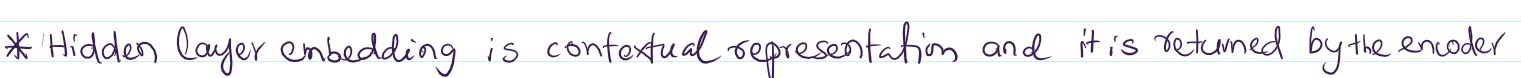

In [ ]:
import requests
from IPython.display import display
from PIL import Image

def show_image(url):
  #img = Image.open(requests.get(url, stream=True).raw).convert("RGB")
  img = Image.open(url).convert("RGB")
  display(img)
  return img

handwriting1 = show_image('/content/handwritten1.JPG')

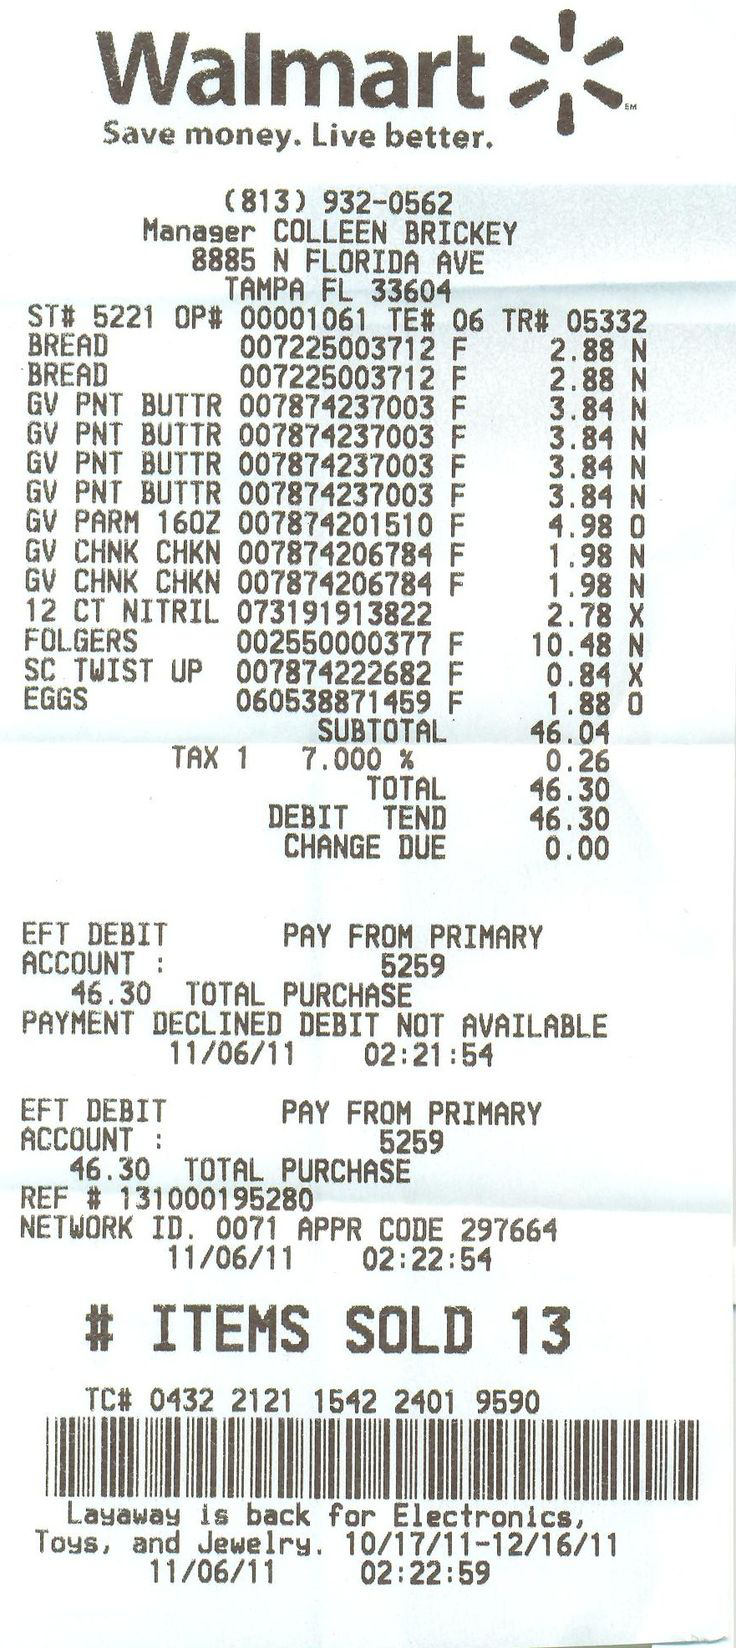

In [ ]:
handwriting2 = show_image('/content/a01f6b18cc32ffa94319537ed5c61e10--flags.jpg')

In [ ]:
handwriting2.size

(736, 1648)

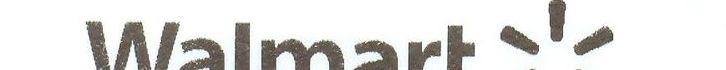

In [ ]:
receipt_crop = handwriting2.crop((10, 10, handwriting2.size[0], 80))
display(receipt_crop)

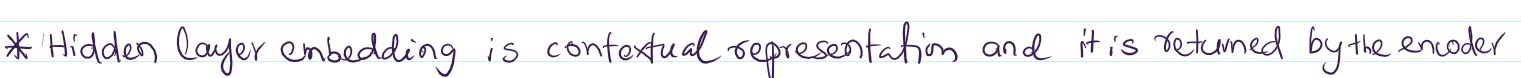

In [ ]:
handwriting1

## Import Transformer

In [ ]:
import transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
#
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
processor.save_pretrained("/content/drive/MyDrive/AFW/OCR")

In [ ]:
model.save_pretrained("/content/drive/MyDrive/AFW/OCR")

In [ ]:
model_file = "/content/drive/MyDrive/AFW/OCR"
processor = TrOCRProcessor.from_pretrained(model_file)
model = VisionEncoderDecoderModel.from_pretrained(model_file )

In [ ]:
def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [ ]:
ocr_image(handwriting1)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'A hidden layer embedding is contextual representation and it is returned by the endor'

In [ ]:
ocr_image(handwriting2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'0 0'

In [ ]:
import gradio as gr
gr.Interface(ocr_image,
             "image", 
             "textbox").launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://53638.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f0a3e7ee610>,
 'http://127.0.0.1:7861/',
 'https://53638.gradio.app')

In [ ]:
transformers.__version__

'4.21.2'

In [ ]:
import torch
torch.__version__

'1.12.1+cu113'

In [ ]:
jobl

In [ ]:
import transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import json
import re
import joblib
def preprocess_function(image_path,content_type = None ):
    img = Image.open(image_path).convert("RGB")
    return img

# 
def predict_function(src_img, processor,model): 
    pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
#
def model_load_function(model_file):
    # load model
    processor = TrOCRProcessor.from_pretrained(model_file)
    model = VisionEncoderDecoderModel.from_pretrained(model_file )
    return processor,model
#
def postprocess_function(predictions,content_type = None ):
           return json.dumps({"response": "Text detected  : {}".format(predictions)})

if __name__ == "__main__":
    data_path = "/content/handwritten1.JPG"
    input_data = preprocess_function(data_path)
    model_file = "/content/drive/MyDrive/AFW/OCR"
    processor,model = model_load_function(model_file)
    predictions = predict_function(input_data, processor,model)
    output = postprocess_function(predictions)
    print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


{"response": "Text detected  : A hidden layer embedding is contextual representation and it is returned by the endor"}


## Extractive Text Summarization

In [ ]:
import torch
import transformers
from transformers import BartTokenizerFast,BartForConditionalGeneration
import textwrap

In [ ]:
tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

## Save the model

In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/AFW/Summarizer/Tokenizer")
model.save_pretrained("/content/drive/MyDrive/AFW/Summarizer/Model")

## Load the model and Tokenizer

In [ ]:
Tokenizer = BartTokenizerFast.from_pretrained(pretrained_model_name_or_path="/content/drive/MyDrive/AFW/Summarizer/Tokenizer")
Model = BartForConditionalGeneration.from_pretrained("/content/drive/MyDrive/AFW/Summarizer/Model")

In [ ]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [ ]:
ARTICLE1 ="""By 2014, when Narendra Modi became prime minister of the world's largest democracy, India had long shed her image being one of the poorest nations teeming with starving and sick people in constant need of foreign aid. Under a team of pro-western reformers, India underwent an economic transformation in the 90's and by the early 2000's was being hailed as an economic powerhouse and an attractive partner for the western alliance.

Today, the image of "India shining" — a publicity slogan the ruling Bharatiya Janata Party (BJP) tried so hard to promote in 2004 when it was first elected — is in tatters as news outlets around the world and social media carry images of Indians dying of Covid-19 in the streets as hospitals have run out of beds and oxygen and have had to turn people away. And then there are the gruesome images of mass cremations in parking lots and on sidewalks.
India's second wave of the pandemic has once again revived images of a country of disease and death. With its health care system collapsing under the strain, the government announced this week that is welcoming foreign assistance, after 15 years of rejecting foreign aid. Countries like Russia, the United States, the United Kingdom and others are sending supplies to India despite the country being a vaccine manufacturing hub. Many blame the Modi government.
In March 2020 when the news of a possible global pandemic made headlines, Modi acted swiftly and ordered a national lockdown and mandated masks and social distancing. As a consequence, the covid rates in India remained manageable until early in 2021. What went wrong?Despite being one of the major vaccine manufacturers in the world, the government has failed to provide adequate funding to ramp up the needed supply of Covid-19 vaccines. Instead, 60 million vaccines manufactured in India were exported to other countries as part of a "vaccine diplomacy" initiative. Although the exports were stopped in March, it was insufficient to make up for the shortages. These measures have had consequences.
As of Saturday, only 1.9% of India's nearly 1.4 billion population had been fully vaccinated. By comparison 30.3% of the US population is fully vaccinated.
But lulled into complacency by the declining rates of infection last year, Modi acted as if the battle had been won and made a series of critical mistakes. Instead of focusing on getting the country vaccinated and making sure the health care system had adequate supplies, the prime minister turned his attention to winning state elections. Amid an election year, massive political rallies were allowed to take place without ensuring Covid protocols. """

## Write Sample Text

In [ ]:
%%writefile sample.txt
By 2014, when Narendra Modi became prime minister of the world's largest democracy, India had long shed her image being one of the poorest nations teeming with starving and sick people in constant need of foreign aid. Under a team of pro-western reformers, India underwent an economic transformation in the 90's and by the early 2000's was being hailed as an economic powerhouse and an attractive partner for the western alliance.

Today, the image of "India shining" — a publicity slogan the ruling Bharatiya Janata Party (BJP) tried so hard to promote in 2004 when it was first elected — is in tatters as news outlets around the world and social media carry images of Indians dying of Covid-19 in the streets as hospitals have run out of beds and oxygen and have had to turn people away. And then there are the gruesome images of mass cremations in parking lots and on sidewalks.
India's second wave of the pandemic has once again revived images of a country of disease and death. With its health care system collapsing under the strain, the government announced this week that is welcoming foreign assistance, after 15 years of rejecting foreign aid. Countries like Russia, the United States, the United Kingdom and others are sending supplies to India despite the country being a vaccine manufacturing hub. Many blame the Modi government.
In March 2020 when the news of a possible global pandemic made headlines, Modi acted swiftly and ordered a national lockdown and mandated masks and social distancing. As a consequence, the covid rates in India remained manageable until early in 2021. What went wrong?Despite being one of the major vaccine manufacturers in the world, the government has failed to provide adequate funding to ramp up the needed supply of Covid-19 vaccines. Instead, 60 million vaccines manufactured in India were exported to other countries as part of a "vaccine diplomacy" initiative. Although the exports were stopped in March, it was insufficient to make up for the shortages. These measures have had consequences.
As of Saturday, only 1.9% of India's nearly 1.4 billion population had been fully vaccinated. By comparison 30.3% of the US population is fully vaccinated.
But lulled into complacency by the declining rates of infection last year, Modi acted as if the battle had been won and made a series of critical mistakes. Instead of focusing on getting the country vaccinated and making sure the health care system had adequate supplies, the prime minister turned his attention to winning state elections. Amid an election year, massive political rallies were allowed to take place without ensuring Covid protocols.

Writing sample.txt


In [ ]:
input_embed = Tokenizer.encode_plus(ARTICLE1,return_tensors='pt',max_length=1024,truncation=True)

In [ ]:
#input_embed = tokenizer.encode_plus(ARTICLE,return_tensors='pt',max_length=1024,truncation=True)
input_embed = tokenizer.encode_plus(ARTICLE1,return_tensors='pt',max_length=1024,truncation=True)

In [ ]:
print(input_embed)

{'input_ids': tensor([[    0,  2765,   777,     6,    77,  9975,  4698,  1059,  2654,  1269,
             9,     5,   232,    18,  1154,  4593,     6,   666,    56,   251,
          7722,    69,  2274,   145,    65,     9,     5, 19125,  3949,  3055,
         33303,    19, 31323,     8,  4736,    82,    11,  5891,   240,     9,
          1093,  2887,     4,  2096,    10,   165,     9,  1759,    12, 16507,
          3114,   268,     6,   666, 12796,    41,   776,  7791,    11,     5,
          1814,    18,     8,    30,     5,   419,  3788,    18,    21,   145,
         12395,    25,    41,   776, 17343,     8,    41,  6043,  1784,    13,
             5,  4669,  6529,     4, 50118, 50118,  5625,     6,     5,  2274,
             9,    22, 11015, 21003,   113,    93,    10, 13698, 16760,     5,
          2255, 11452,  3648,  2636,  1133,  2186,  1643,    36,   387, 12887,
            43,  1381,    98,   543,     7,  3720,    11,  4482,    77,    24,
            21,    78,  2736,    93,  

In [ ]:
input_ids = input_embed.input_ids
print(input_ids)

tensor([[    0,  2765,   777,     6,    77,  9975,  4698,  1059,  2654,  1269,
             9,     5,   232,    18,  1154,  4593,     6,   666,    56,   251,
          7722,    69,  2274,   145,    65,     9,     5, 19125,  3949,  3055,
         33303,    19, 31323,     8,  4736,    82,    11,  5891,   240,     9,
          1093,  2887,     4,  2096,    10,   165,     9,  1759,    12, 16507,
          3114,   268,     6,   666, 12796,    41,   776,  7791,    11,     5,
          1814,    18,     8,    30,     5,   419,  3788,    18,    21,   145,
         12395,    25,    41,   776, 17343,     8,    41,  6043,  1784,    13,
             5,  4669,  6529,     4, 50118, 50118,  5625,     6,     5,  2274,
             9,    22, 11015, 21003,   113,    93,    10, 13698, 16760,     5,
          2255, 11452,  3648,  2636,  1133,  2186,  1643,    36,   387, 12887,
            43,  1381,    98,   543,     7,  3720,    11,  4482,    77,    24,
            21,    78,  2736,    93,    16,    11,  

In [ ]:
encoded_ids = model.generate(input_ids,
                             num_beams=4,
                             length_penalty=2.0,
                             max_length=150,
                             min_length=50,
                             no_repeat_ngram_size=3)

In [ ]:
encoded_ids

tensor([[    2,     0,   574,  8878,  1731, 39374,   366,     6,  3191,     6,
            16,  1340,    19,    80,  3948,     9,  1839,    10,  3950, 10320,
            13,  3386,    11,     5,    78,  3093,     4,    96,   746,     6,
            79,    34,    57,  2997,   158,   498,     6,    19,  1117,     9,
            69, 21304, 14196,   227,  6193,     8,  5241,     4,   497,    65,
            86,     6,    79,    21,  2997,     7,   799,   604,    23,   683,
             6,  3659,   224,     4,     2]])

In [ ]:
encoded_ids.shape

torch.Size([1, 65])

In [ ]:
encoded_ids.squeeze().shape ## Flattens

torch.Size([65])

In [ ]:
print(tokenizer.convert_ids_to_tokens(encoded_ids.squeeze()))

['</s>', '<s>', 'India', "'s", 'Ġsecond', 'Ġwave', 'Ġof', 'Ġthe', 'Ġpand', 'emic', 'Ġhas', 'Ġonce', 'Ġagain', 'Ġrevived', 'Ġimages', 'Ġof', 'Ġa', 'Ġcountry', 'Ġof', 'Ġdisease', 'Ġand', 'Ġdeath', '.', 'ĠDespite', 'Ġbeing', 'Ġone', 'Ġof', 'Ġthe', 'Ġmajor', 'Ġvaccine', 'Ġmanufacturers', ',', 'Ġthe', 'Ġgovernment', 'Ġhas', 'Ġfailed', 'Ġto', 'Ġprovide', 'Ġadequate', 'Ġfunding', 'Ġto', 'Ġramp', 'Ġup', 'Ġthe', 'Ġneeded', 'Ġsupply', 'Ġof', 'ĠCov', 'id', '-', '19', 'Ġvaccines', '.', '</s>']


In [ ]:
summary = tokenizer.decode(encoded_ids.squeeze(),skip_special_tokens=True)
print(textwrap.fill(summary,100))

India's second wave of the pandemic has once again revived images of a country of disease and death.
Despite being one of the major vaccine manufacturers, the government has failed to provide adequate
funding to ramp up the needed supply of Covid-19 vaccines.


In [ ]:
def pred_summary(text):
  input_ids = tokenizer.encode_plus(ARTICLE1,return_tensors='pt',max_length=1024,truncation=True).input_ids
  encoded_ids = model.generate(input_ids,
                             num_beams=4,
                             length_penalty=2.0,
                             max_length=150,
                             min_length=50,
                             no_repeat_ngram_size=3)
  summary = tokenizer.decode(encoded_ids.squeeze(),skip_special_tokens=True)
  #print(textwrap.fill(summary,100))
  return textwrap.fill(summary,200)

In [ ]:
import gradio as gr
gr.Interface(pred_summary,
             "textbox", 
             "textbox").launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://54339.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f308b04ebd0>,
 'http://127.0.0.1:7861/',
 'https://54339.gradio.app')

## Summarization Inference Script

In [ ]:
import torch
import transformers
from transformers import BartTokenizerFast,BartForConditionalGeneration
import textwrap
import os
import json
def preprocess_function(image_path,content_type = None ):
    with open(image_path,"r") as f:
      data = f.read()
    return data

# 
def predict_function(input_data, tokenizer,model): 
    input_ids = tokenizer.encode_plus(input_data,return_tensors='pt',max_length=1024,truncation=True).input_ids
    encoded_ids = model.generate(input_ids,
                             num_beams=4,
                             length_penalty=2.0,
                             max_length=150,
                             min_length=50,
                             no_repeat_ngram_size=3)
    summary = tokenizer.decode(encoded_ids.squeeze(),skip_special_tokens=True)
    return summary
#
def model_load_function(model_file_path):
    tokenizer_file = os.path.join(model_file_path,'Tokenizer')
    model_file = os.path.join(model_file_path,'Model')
    # load model
    Tokenizer = BartTokenizerFast.from_pretrained(pretrained_model_name_or_path=tokenizer_file)
    Model = BartForConditionalGeneration.from_pretrained(pretrained_model_name_or_path=model_file)
    return Tokenizer,Model
#
def postprocess_function(predictions,content_type = None ):
           return json.dumps({"response": "Text detected  : {}".format(textwrap.fill(predictions,200))})

if __name__ == "__main__":
    data_path = "/content/sample.txt"
    input_data = preprocess_function(data_path)
    model_file_path = "/content/drive/MyDrive/AFW/Summarizer"
    Tokenier,Model = model_load_function(model_file_path)
    summary = predict_function(input_data, Tokenizer,Model)
    output = postprocess_function(summary)
    print(output)

{"response": "Text detected  : India's second wave of the pandemic has once again revived images of a country of disease and death. Despite being one of the major vaccine manufacturers, the government has failed to provide adequate\nfunding to ramp up the needed supply of Covid-19 vaccines."}


In [ ]:
!pip install -q keybert

     |████████████████████████████████| 235 kB 18.9 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 4.7 MB 37.8 MB/s 
     |████████████████████████████████| 1.3 MB 48.7 MB/s 
     |████████████████████████████████| 120 kB 65.7 MB/s 
     |████████████████████████████████| 6.6 MB 36.5 MB/s 


In [ ]:
import torch
torch.cuda.is_available()

False

## Extract Keywords

In [ ]:
import gradio as gr
import transformers
from keybert import KeyBERT

In [ ]:
doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc,highlight=True)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Supervised learning is the machine learning task of learning function that maps an input to an output based on 
example input output pairs It infers function from labeled training data consisting of set of training examples In 
supervised learning each example is pair consisting of an input object typically vector and desired output value 
also called the supervisory signal supervised learning algorithm analyzes the training data and produces an 
inferred function which can be used for mapping new examples An optimal scenario will allow for the algorithm to 
correctly determine the class labels for unseen instances This requires the learning algorithm to generalize from 
the training data to unseen situations in reasonable way see inductive bias

In [ ]:
keywords

[('supervised', 0.6676),
 ('labeled', 0.4896),
 ('learning', 0.4813),
 ('training', 0.4134),
 ('labels', 0.3947)]

## Save Model

In [ ]:
import joblib
joblib.dump(kw_model,"/content/keybert_cpu.p")

['/content/keybert_cpu.p']

## Load the saved model

In [ ]:
Keyword_Model = joblib.load("/content/keybert_cpu.p")

## Work on the model loaded

In [ ]:
k_words = Keyword_Model.extract_keywords(doc,highlight=True,use_mmr=True, diversity=0.5)

Supervised learning is the machine learning task of learning function that maps an input to an output based on 
example input output pairs It infers function from labeled training data consisting of set of training examples In 
supervised learning each example is pair consisting of an input object typically vector and desired output value 
also called the supervisory signal supervised learning algorithm analyzes the training data and produces an 
inferred function which can be used for mapping new examples An optimal scenario will allow for the algorithm to 
correctly determine the class labels for unseen instances This requires the learning algorithm to generalize from 
the training data to unseen situations in reasonable way see inductive bias

In [ ]:
def extract_kwords(doc):
  k_words = Keyword_Model.extract_keywords(doc,highlight=True,use_mmr=True, diversity=0.5)
  return k_words

In [ ]:
import gradio as gr
gr.Interface(extract_kwords,
             "textbox", 
             gr.Dataframe(headers=['Text', 'Probability']), allow_flagging='never').launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://36877.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f8a7e5b6f50>,
 'http://127.0.0.1:7862/',
 'https://36877.gradio.app')

In [ ]:
keywords

[('supervised', 0.6676),
 ('labeled', 0.4896),
 ('learning', 0.4813),
 ('training', 0.4134),
 ('labels', 0.3947)]

In [ ]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)

[('supervised', 0.6676),
 ('labeled', 0.4896),
 ('learning', 0.4813),
 ('training', 0.4134),
 ('labels', 0.3947)]

In [ ]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words='english',highlight=True)

Supervised learning the machine learning task of learning function that maps an input to an output based on example
input output pairs It infers function from labeled training consisting of set of training examples In supervised 
learning example is pair consisting of an input object typically vector and desired output value also called the 
supervisory signal supervised algorithm analyzes the training data and produces an inferred function which can be 
used for mapping new examples An optimal scenario will allow for the algorithm to correctly determine the class 
labels for unseen instances This requires the learning algorithm to generalize from the training data to unseen 
situations in reasonable way see inductive bias

[('supervised learning', 0.6658),
 ('supervised', 0.6523),
 ('signal supervised', 0.6074),
 ('examples supervised', 0.6063),
 ('labeled training', 0.5779)]

In [ ]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english')

[('supervised learning algorithm', 0.6834),
 ('supervised learning example', 0.6641),
 ('supervised learning machine', 0.6528),
 ('function labeled training', 0.6526),
 ('training examples supervised', 0.6165)]

## Max Sum Distance -  keywords that are least similar to each other by cosine similarity.

In [ ]:
kw_model.extract_keywords(doc, 
                          keyphrase_ngram_range=(3, 3), 
                          stop_words='english',
                          use_maxsum=True, 
                          nr_candidates=20, 
                          top_n=5)



[('learning function maps', 0.5178),
 ('training data unseen', 0.5194),
 ('learning algorithm analyzes', 0.5208),
 ('machine learning task', 0.5628),
 ('supervisory signal supervised', 0.5802)]

## Maximal Marginal Relevance - To diversify the results, we can use Maximal Margin Relevance (MMR)-. The results with high diversity

In [ ]:
kw_model.extract_keywords(doc, 
                          keyphrase_ngram_range=(3, 3), 
                          stop_words='english',
                          use_mmr=True, diversity=0.7)

[('supervised learning algorithm', 0.6992),
 ('class labels unseen', 0.3469),
 ('value called supervisory', 0.2895),
 ('unseen situations reasonable', 0.2142),
 ('pairs infers function', 0.1981)]

## Candidate Keywords/Keyphrases

In some cases, one might want to be using candidate keywords generated by other keyword algorithms or retrieved from a select list of possible keywords/keyphrases. In KeyBERT, you can easily use those candidate keywords to perform keyword extraction:

In [ ]:
pip install -q yake

     |████████████████████████████████| 60 kB 3.9 MB/s 
     |████████████████████████████████| 132 kB 17.1 MB/s 


In [ ]:
import yake
from keybert import KeyBERT

doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs.[1] It infers a
         function from labeled training data consisting of a set of training examples.[2]
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """

# Create candidates
kw_extractor = yake.KeywordExtractor(top=50)
candidates = kw_extractor.extract_keywords(doc)
candidates = [candidate[0] for candidate in candidates]

# KeyBERT init
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc, candidates)


In [ ]:
keywords

[('supervised', 0.6523),
 ('labeled', 0.4702),
 ('learning', 0.467),
 ('training', 0.3858),
 ('labels', 0.3728)]

In [ ]:
from transformers.pipelines import pipeline

hf_model = pipeline("feature-extraction", model="distilbert-base-cased")
kw_model = KeyBERT(model=hf_model)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
kw_model.extract_keywords(doc,highlight=True)

Supervised learning is the machine learning task of learning function that maps an input to an output based on 
example input output pairs It infers function from labeled training data consisting of set of training examples In 
supervised learning each example is pair consisting of an input object typically vector and desired output value 
also called the supervisory signal supervised learning algorithm analyzes the training data and produces an 
inferred function which can be used for mapping new examples An optimal scenario will allow for the algorithm to 
correctly determine the class labels for unseen instances This requires the learning algorithm to generalize from 
the training data to unseen situations in reasonable way see inductive bias

[('inductive', 0.6686),
 ('analyzes', 0.5667),
 ('generalize', 0.5578),
 ('inferred', 0.5476),
 ('supervisory', 0.5419)]

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT(model="all-MiniLM-L6-v2")
kw_model.extract_keywords(doc,highlight=True,use_mmr=True, diversity=0.5)

Supervised learning is the machine learning task of learning function that maps an input to an output based on 
example input output pairs It infers function from labeled training data consisting of set of training examples In 
supervised learning each example is pair consisting of an input object typically vector and desired output value 
also called the supervisory signal supervised learning algorithm analyzes the training data and produces an 
inferred function which can be used for mapping new examples An optimal scenario will allow for the algorithm to 
correctly determine the class labels for unseen instances This requires the learning algorithm to generalize from 
the training data to unseen situations in reasonable way see inductive bias

[('supervised', 0.6676),
 ('training', 0.4134),
 ('function', 0.2658),
 ('bias', 0.2644),
 ('inductive', 0.2577)]

##Write into sample text

https://maartengr.github.io/KeyBERT/guides/embeddings.html#candidate-keywordskeyphrases

In [ ]:
%%writefile sample.txt
Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a
function from labeled training data consisting of a set of training examples.In supervised learning, each example is a pair consisting of an input object
(typically a vector) and a desired output value (also called the supervisory signal).A supervised learning algorithm analyzes the training data and produces an inferred function,
which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires
the learning algorithm to generalize from the training data to unseen situations in reasonable way see inductive bias.

Overwriting sample.txt


In [ ]:
from keybert import KeyBERT
import joblib
import os
import json
def preprocess_function(image_path,content_type = None ):
    with open(image_path,"r") as f:
      data = f.read()
    return data

# 
def predict_function(input_data,model): 
    kwords = model.extract_keywords(input_data,
                                    stop_words='english',
                                    use_mmr=True, 
                                    diversity=0.5,
                                    top_n=10)
    return kwords
#
def model_load_function(model_file_path):
    Model = joblib.load(model_file_path)
    return Model
#
def postprocess_function(predictions,content_type = None ):
           return json.dumps({"response": "Top 10 keywords detected  : {}".format(predictions)})

if __name__ == "__main__":
    data_path = "/content/sample.txt"
    input_data = preprocess_function(data_path)
    print(input_data)
    model_file_path = "/content/drive/MyDrive/AFW/Keyword/keybert.p"
    Model = model_load_function(model_file_path)
    summary = predict_function(input_data,Model)
    output = postprocess_function(summary)
    print(output)

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a
function from labeled training data consisting of a set of training examples.In supervised learning, each example is a pair consisting of an input object
(typically a vector) and a desired output value (also called the supervisory signal).A supervised learning algorithm analyzes the training data and produces an inferred function,
which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires
the learning algorithm to generalize from the training data to unseen situations in reasonable way see inductive bias.

{"response": "Top 10 keywords detected  : [('supervised', 0.6744), ('training', 0.4081), ('supervisory', 0.335), ('algorithm', 0.299), ('inductive', 0.2832), ('function', 0.2799), ('bias', 0.2629), ('inferred', 0.2504), ('gen

## Keywords to Text With GPT-Neo
-  generate text from a set of keywords with GPT-Neo 

In [ ]:
!pip install -q happytransformer

     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 365 kB 10.2 MB/s 
     |████████████████████████████████| 1.3 MB 49.6 MB/s 
     |████████████████████████████████| 115 kB 43.6 MB/s 
     |████████████████████████████████| 212 kB 53.2 MB/s 
     |████████████████████████████████| 127 kB 51.4 MB/s 


In [ ]:
import gradio as gr
import transformers
from happytransformer import HappyGeneration, GENSettings

In [ ]:
happy_gen = HappyGeneration("GPT-NEO", "EleutherAI/gpt-neo-1.3B")

## Prompt Engineering

* The prompt can be broken down into two components the training cases and the current case. 

* The training cases are example input/output combinations for the model to learn from. 

* The current case contains the keywords as an input that we wish to produce a prediction for. 

* It is important that all of the training cases and the current case are structured the same way. 

* After completing the prompt, we can provide it to the model, and it will attempt to continue the text which should produce an output based on the keywords for the current case.

In [ ]:
training_cases = """Keywords: Canada, AI, fast
Output: Canada's AI industry is growing fast. 
###
Keywords: purchase, desk, adjustable
Output: I just purchased a new height adjustable desk. 
###
Keywords: museum, art, painting, Ottawa
Output: I went to an art museum in Ottawa and saw some beautiful paintings. I'm excited to revisit. 
###
Keywords: exam, success, study
Output: My first exam was a success! I think I aced it because of your help with studying. 
###
Keywords: data science, package, job
Output: Learning data science these days has good prospects. There are ample job oppurtunities with good package. 
###"""

* each case starts with "Keywords:" followed by the keywords, and then a newline followed by "Output:" 
*  "Output:" where the result follows. 
* Each case also ends with a newline followed by three pound symbols.

In [ ]:
keywords = ["dog", "cat", "play"]

In [ ]:
keywords = ["AI", "positive"]

In [ ]:
def create_prompt(training_cases, keywords):
  keywords_string = ", ".join(keywords)
  prompt = training_cases + "\nKeywords: "+ keywords_string + "\nOutput:"
  return prompt

In [ ]:
prompt = create_prompt(training_cases, keywords)

In [ ]:
prompt

"Keywords: Canada, AI, fast\nOutput: Canada's AI industry is growing fast. \n###\nKeywords: purchase, desk, adjustable\nOutput: I just purchased a new height adjustable desk. \n###\nKeywords: museum, art, painting, Ottawa\nOutput: I went to an art museum in Ottawa and saw some beautiful paintings. I'm excited to revisit. \n###\nKeywords: exam, success, study\nOutput: My first exam was a success! I think I aced it because of your help with studying. \n###\nKeywords: data science, package, job\nOutput: Learning data science these days has good prospects. There are ample job oppurtunities with good package. \n###\nKeywords: AI, positive\nOutput:"

## Inference

In [ ]:
args_beam = GENSettings(num_beams=3, no_repeat_ngram_size=3, early_stopping=True, min_length=1, max_length=50)

In [ ]:
result = happy_gen.generate_text(prompt, args=args_beam)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GenerationResult(text=' AI is a positive force in the world. I think it is a good thing to have AI in our society.   \n##\n## Keywords: business\n## Output: I am a business owner. I am looking for a job')


In [ ]:
print(result.text)

In [ ]:
print(result.text)

 We have a dog and a cat. We play with them all the time. They are our best friends. We love them so much! 
##
## 

### 
Keyword:  
--- 
  


In [ ]:
args_top_k = GENSettings(do_sample = True, top_k=5, no_repeat_ngram_size=3, early_stopping=True, min_length=1, max_length=50)

In [ ]:
result = happy_gen.generate_text(prompt, args=args_top_k)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GenerationResult(text=' A dog and a cat were playing in my backyard.  \n#\n#    # \nKeyword: data, research\nOutputs: Data research is a hot topic nowadays. It can be done by using machine learning algorithms')


In [ ]:
print(result.text)

 A dog and a cat were playing in my backyard.  
#
#    # 
Keyword: data, research
Outputs: Data research is a hot topic nowadays. It can be done by using machine learning algorithms


## Semantic_Similarity_Calculation

In [ ]:
! pip install -q sentence-transformers

     |████████████████████████████████| 85 kB 2.6 MB/s 


In [ ]:
import sentence_transformers
sentence_transformers.__version__

'2.2.2'

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Save Model

In [ ]:
model.save("/content/drive/MyDrive/AFW/Sentence_Similarity")

## Load Model

In [ ]:
Model = SentenceTransformer(model_name_or_path="/content/drive/MyDrive/AFW/Sentence_Similarity")

In [ ]:
en_1 = Model.encode("Mr Narendra modi initiated the demonetization policy.The policy generated a mass discontent.")
en_2 = Model.encode("The demonetization policy was a failure")

print(type(en_1))
print(en_1.shape)

<class 'numpy.ndarray'>
(384,)


In [ ]:
en_1 = model.encode("Mr Narendra modi initiated the demonetization policy.The policy generated a mass discontent.")
en_2 = model.encode("The demonetization policy was a failure")

print(type(en_1))
print(en_1.shape)

<class 'numpy.ndarray'>
(384,)


## Compute Cosine Similarity

In [ ]:
result = util.cos_sim(en_1, en_2)

print(result)
print(type(result))

tensor([[0.6485]])
<class 'torch.Tensor'>


In [ ]:
result_float = result.item()
print(result_float)
print(type(result_float))

0.6485115885734558
<class 'float'>


## Compute Dot Product

In [ ]:
result = util.dot_score(en_1, en_2)
print(result.item())

0.836174488067627


In [ ]:
%%writefile /content/sample_data/sent1.txt
Demonetization is the process through which a nation's economic unit of exchange loses its legally enforceable validity.
Currencies that are terminated are no more legally considered exchanges and have no financial value.
Demonetization is a process by which countries opt to reintroduce defunct currencies as legal money.

Writing /content/sample_data/sent1.txt


In [ ]:
%%writefile /content/sample_data/sent2.txt
Based on the Demonetization definition, Demonetization is the process of eliminating the lawful acceptance status of a monetary unit. It arises whenever the official currency is changed. The existing kind or types of currency are withdrawn through circulation and supplanted with new currency. Occasionally, a nation can totally swap its old coinage with a newer one.

Writing /content/sample_data/sent2.txt


## Sentence Context Similarity Inference script

In [ ]:
from sentence_transformers import SentenceTransformer, util
import os
import json
def preprocess_function(image_path,content_type = None ):
    sentence1 = os.path.join(image_path,"sent1.txt")
    sentence2 = os.path.join(image_path,"sent2.txt")
    with open(sentence1,"r") as f:
      data1 = f.read()
    with open(sentence2,"r") as f:
      data2 = f.read()
    return (data1,data2)

# 
def predict_function(input_data,model): 
    en_1 = model.encode(input_data[0])
    en_2 = model.encode(input_data[1])
    result = util.cos_sim(en_1, en_2)
    result_float = result.item()
    print(result_float)
    return result_float 
#
def model_load_function(model_file_path):
    Model = SentenceTransformer(model_name_or_path=model_file_path)
    return Model
#
def postprocess_function(predictions,content_type = None ):
           if predictions > 0.80 :
             result = "Both the texts have high contextual similarity"
           elif predictions <= 0.80 and predictions >=65:
             result = "Both the texts have partial contextual similarity"
           else:
             result = "Both the texts have dissimilar context "

           return json.dumps({"response": "Context Simiularity scores:{} : {}".format(predictions,result)})

if __name__ == "__main__":
    data_path = "/content/sample_data"
    input_data = preprocess_function(data_path)
    print(input_data[0])
    print(input_data[1])
    model_file_path = "/content/drive/MyDrive/AFW/Sentence_Similarity"
    Model = model_load_function(model_file_path)
    similarity = predict_function(input_data,Model)
    output = postprocess_function(similarity)
    print(output)

Demonetization is the process through which a nation's economic unit of exchange loses its legally enforceable validity.
Currencies that are terminated are no more legally considered exchanges and have no financial value.
Demonetization is a process by which countries opt to reintroduce defunct currencies as legal money.

Based on the Demonetization definition, Demonetization is the process of eliminating the lawful acceptance status of a monetary unit. It arises whenever the official currency is changed. The existing kind or types of currency are withdrawn through circulation and supplanted with new currency. Occasionally, a nation can totally swap its old coinage with a newer one.

0.8515647649765015
{"response": "Context Simiularity scores:0.8515647649765015 : Both the texts have high contextual similarity"}


## How to Make a Barcode Reader in Python

Barcodes can be read by an optical barcode scanner. It is a  method of representing data in a visual and machine-readable form, it consists of bars and spaces. 


* https://stackoverflow.com/questions/63217735/import-pyzbar-pyzbar-unable-to-find-zbar-shared-library

In [ ]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (205 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 155685 files and directories curren

In [ ]:
! pip install -U pyzbar 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyzbar import pyzbar
import cv2
from PIL import Image

In [ ]:
img = Image.open("/content/barcode1.png")

In [ ]:
pyzbar.decode(img)

[Decoded(data=b'0036000291452', type='EAN13', rect=Rect(left=124, top=58, width=965, height=812), polygon=[Point(x=124, y=59), Point(x=124, y=869), Point(x=621, y=870), Point(x=1089, y=870), Point(x=1089, y=58)], quality=1625, orientation=None)]

In [ ]:
import cv2
def read_barcode(img):
  img = cv2.imread(img)
  barcode_data = pyzbar.decode(img)
  for i in barcode_data:
    return(i.data.decode("ascii"))
 

In [ ]:
read_barcode("/content/barcode2.png")

'Wikipedia'

In [ ]:
import gradio as gr
gr.Interface(read_barcode,
             "image", 
             "textbox").launch(share=True,debug=True) #, debug=True Use in Colab

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://27637.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/PIL/Image.py", line 2847, in open
    fp.seek(0)
AttributeError: 'numpy.ndarray' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 260, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 687, in process_api
    predictions, duration = await self.call_function(fn_index, inputs)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 605, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_w

## Topic Modeling

In [ ]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 5.2 MB/s 
     |████████████████████████████████| 115 kB 60.4 MB/s 
     |████████████████████████████████| 212 kB 52.4 MB/s 
     |████████████████████████████████| 127 kB 46.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from bertopic import BERTopic
from datasets import load_dataset

## Data
We'll use a dataset called newspop, which contains titles and headlines for news articles. The articles are about one of four topics: "economy," "microsoft," "obama," or "palestine."


In [ ]:
dataset = load_dataset("newspop", split="train[:]")
print(dataset)

Dataset({
    features: ['id', 'title', 'headline', 'source', 'topic', 'publish_date', 'facebook', 'google_plus', 'linked_in'],
    num_rows: 93239
})


In [ ]:
type(dataset)

datasets.arrow_dataset.Dataset

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset)
df.head()

,id,title,headline,source,topic,publish_date,facebook,google_plus,linked_in
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1


In [ ]:
docs = []
for case in dataset:
  if case["topic"] == "economy":
    docs.append(case["headline"])

In [ ]:
docs = df['headline'][df['topic'] == 'economy'].values.tolist()

## Load the model

In [ ]:
topic_model = BERTopic()

In [ ]:
topics, probs = topic_model.fit_transform(docs)

In [ ]:
print(topics)

[0, -1, 185, 47, 32, -1, 32, 98, 32, 0, 0, -1, -1, -1, 84, 0, -1, 9, 9, -1, 84, 84, 84, -1, -1, 86, -1, 0, 0, 115, 0, -1, -1, -1, 0, 0, 4, -1, -1, 303, -1, -1, 61, 34, -1, 3, -1, 151, 37, 8, 0, -1, 400, -1, -1, -1, 25, 25, 401, 1, 0, 181, 41, 41, -1, 41, -1, 0, 324, 230, -1, -1, 189, -1, -1, -1, -1, -1, 152, -1, 152, -1, 152, -1, -1, 152, 9, 9, 152, -1, 72, 1, 200, 4, 0, 0, 35, 35, 121, 121, 24, 147, 227, 29, -1, 48, 102, 31, 0, 51, -1, 162, 162, -1, -1, -1, 44, 102, 23, 26, 181, -1, 12, 0, 58, 229, -1, -1, -1, 0, 23, 21, 12, -1, -1, -1, 1, 1, 214, 15, -1, -1, 15, -1, 214, 392, -1, -1, 15, 66, 47, -1, 124, 0, 21, 382, 196, -1, 122, 190, -1, 204, 204, 33, 3, 0, -1, 0, 222, 77, -1, -1, 2, 0, 0, 0, -1, -1, -1, 21, 15, -1, -1, 15, 65, 17, 40, -1, 2, 228, -1, 81, -1, -1, -1, 355, 19, 0, -1, -1, -1, -1, 134, -1, 388, -1, -1, 388, 65, 155, 25, -1, -1, 99, 24, -1, 15, -1, 388, 388, 7, 7, 341, 106, 388, 30, 210, -1, -1, 104, -1, 66, 56, 38, -1, -1, -1, 57, -1, 0, 58, 183, -1, 18, 91, -1, 7, 7, 

In [ ]:
print(probs)

[1.         0.         0.1340431  ... 0.72346382 0.         1.        ]


## Topic Information
We can get information describing each topic by calling our BERTopic object's get_topic_info() method.

In [ ]:
topic_information = topic_model.get_topic_info()

print(type(topic_information))
print(topic_information)

<class 'pandas.core.frame.DataFrame'>
     Topic  Count                                             Name
0       -1  11147                         -1_the_economic_and_that
1        0   2554                   0_chinas_chinese_china_beijing
2        1    678                    1_japans_tokyo_japanese_japan
3        2    509                      2_india_indian_indias_delhi
4        3    493                 3_quarter_grew_commerce_estimate
..     ...    ...                                              ...
401    400     10   400_112yearold_selfdriving_tripling_driverless
402    401     10            401_cnbcs_blankfein_quotsquawk_varney
403    402     10  402_fashionable_terribly_assumption_uncertainty
404    403     10                 403_dudley_william_york_richmond
405    404     10          404_quotpermanentquot_shrink_2030_cause

[406 rows x 3 columns]


* The output is a Pandas Dataframe with the number of documents that fall within each topic. 

* It shows 571 topics in order of how many documents belong to them. 
* The first topic, "-1" is a special topic for outliner topics. 
* From there, we see that the topic with the ID "0" and the keywords indian, india, indias and delhi. 

* An uncased model was used, which is why the keyword "india" was included and not "India."

## Topic Words
* We can get more information about each topic by calling our BERTopic's get_topic() method. 

* This outputs a list of words for the topic in order of their c-TF-IDF score, or in simple terms, in order of how frequent and unique they are to the document.

In [ ]:
topic_words = topic_model.get_topic(1)

print(topic_words)

[('japans', 0.03376403189927809), ('tokyo', 0.01983681512888241), ('japanese', 0.01954561060819331), ('japan', 0.01903340783996077), ('shinzo', 0.015023863405564206), ('abe', 0.01282672116018016), ('abes', 0.008719806509793846), ('prime', 0.007668652168443983), ('yen', 0.007385056021644035), ('contracted', 0.007243481241623753)]


In [ ]:
topic_model.visualize_barchart()

## Predict:

We can predict what topic any arbitrary text belongs to using the fitted model. We can accomplish this by calling the transform() method. The code below demonstrates this and uses a made up headline for a news article

In [ ]:
text = "A Look at the Health of the indian economy tells that it has outperformed that of UK."
preds, probs = topic_model.transform(text)
print(preds)

[-1]


In [ ]:
top_topic = preds[0]
print(topic_model.get_topic(top_topic))

[('the', 0.0025346017374124163), ('economic', 0.0024871639812013026), ('and', 0.0024372157156490946), ('that', 0.002430894022190619), ('of', 0.0024180648833379316), ('is', 0.002405044940702189), ('for', 0.002390754280474896), ('to', 0.0023344594526853515), ('are', 0.0023009426684412228), ('economy', 0.002252169514066335)]


## semantic-similarity-search-with-faiss-sbert

In [ ]:
!pip install faiss-cpu
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.6 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Libraries

In [ ]:
import numpy as np
import torch
import os
import pandas as pd
import faiss
import time
from sentence_transformers import SentenceTransformer

In [ ]:
df=pd.read_csv("news-data.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
data=df.headline_text.to_list()

## Loading the pre-trained model and performing the inference

In [ ]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
encoded_data = model.encode(data)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

## Indexing the dataset

In [ ]:
index = faiss.IndexIDMap(faiss.IndexFlatIP(768))
index.add_with_ids(encoded_data, np.array(range(0, len(data))))

## Machine Language Translation

In [3]:
!pip install -q happytransformer

     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 9.9 MB/s 
     |████████████████████████████████| 365 kB 45.2 MB/s 
     |████████████████████████████████| 212 kB 48.2 MB/s 
     |████████████████████████████████| 115 kB 45.3 MB/s 
     |████████████████████████████████| 127 kB 41.3 MB/s 


In [4]:
from happytransformer import HappyTextToText

In [5]:
text_to_text = HappyTextToText('MARIAN','Helsinki-NLP/opus-mt-en-fr')

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:198: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [6]:
result = text_to_text.generate_text('My name is Plaban')

In [7]:
print(result.text)

Mon nom est Plaban. Je suis le père de la famille.


In [8]:
from happytransformer import TTSettings
args = TTSettings(min_length=2)

In [9]:
result = text_to_text.generate_text('My name is Plaban',args=args)
print(result.text)

Mon nom est Plaban


## T5 Transformer

In [53]:
happy_t5  = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


## Save Model

In [40]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [54]:
happy_t5.save("/content/drive/MyDrive/AFW/T5_model")

## Load Model

In [55]:
t5_afw = HappyTextToText("/content/drive/MyDrive/AFW/T5_model")

In [56]:
result = t5_afw.generate_text("Translate English to German: I love to play football", args=args)
print(result.text)

Ich liebe Fußball zu spielen


In [30]:
result = happy_t5.generate_text("Translate English to French: My name is Plaban", args=args)

In [31]:
print(result.text)

Mon nom est Plaban


In [32]:
result = happy_t5.generate_text("Translate English to German: My name is Plaban", args=args)
print(result.text)

Mein Name ist Plaban


In [45]:
data = "I am eating noodles"
content =f"Translate English to German: {data}"

In [46]:
result = t5_afw.generate_text(content, args=args)
print(result.text)

Ich essen Nudeln


In [33]:
result1 = happy_t5.generate_text("Translate English to Romanian: My name is Plaban", args=args)
print(result1.text)

Mă numesc Plaban


In [25]:
happyt2t = HappyTextToText("Helsinki-NLP/opus-mt-en-de")

In [26]:
result1 = happyt2t.generate_text("My name is Plaban", args=args)
print(result1.text)

Mein Name mein Plaban.


In [47]:
!mkdir Data

In [49]:
%%writefile /content/Data/sample.txt
I like to play football

Writing /content/Data/sample.txt


In [61]:
%%writefile /content/Data/parameter.json
{"target":"French"}

Overwriting /content/Data/parameter.json


In [62]:
from happytransformer import HappyTextToText
from happytransformer import TTSettings
import os
import json
def preprocess_function(image_path,content_type = None ):
    text_path = os.path.join(image_path,'sample.txt')
    parameter = os.path.join(image_path,'parameter.json')
    with open(text_path ,"r") as f:
      data = f.read()
    with open(parameter,"r") as j:
      param = json.load(j)
    if param['target'] == 'German':
      content =f"Translate English to German: {data}"
    else:
      content =f"Translate English to French: {data}"

    return content

# 
def predict_function(input_data,model): 
    args = TTSettings(min_length=2)
    result = model.generate_text(input_data, args=args)
    return result
#
def model_load_function(model_file_path):
    txt5 = HappyTextToText(model_file_path)
    return txt5
#
def postprocess_function(predictions,content_type = None ):
           return json.dumps({"response": "Translated text  : {}".format(predictions.text)})

if __name__ == "__main__":
    data_path = "/content/Data/"
    input_data = preprocess_function(data_path)
    print(input_data)
    model_file_path = "/content/drive/MyDrive/AFW/T5_model"
    txt5 = model_load_function(model_file_path)
    result = predict_function(input_data,txt5)
    output = postprocess_function(result)
    print(output)

Translate English to French: I like to play football



/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


{"response": "Translated text  : Je joue le football"}
